# (3.12) Exercise:

*1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
*2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

In [1]:
# taken reference from https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load habermans.csv into a pandas dataFrame.
had = pd.read_csv("haberman.csv",header=0,names = ['age', 'year', 'nodes', 'status'])

In [2]:
had.head() # to check the dataset. 

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
#TO know the basic info of the dataset
had.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
#To check no. of patients survived more than 5 years, i.e Status=1
##To check no. of patients survived less than 5 years, i.e Status=2
had["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

# 2D Scatter plot

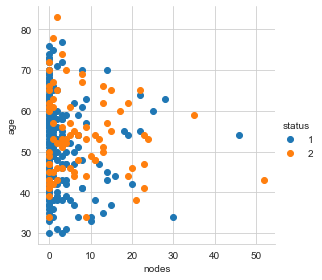

In [5]:
# Plotting a 2D pair plot, to analyse the survival status, on the basis of age and nodes parameter.
sns.set_style("whitegrid");
sns.FacetGrid(had, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend();
plt.show();

# Observation of 2D sactter plot

1. If the age of the patient is in between (30,40) and they are having less than 6 nodes(lymph nodes). There chances of survival is more.

2. If the age of the patient is in between (41,60) and they are having less than 5 nodes(lymph nodes). There chances of survival and non survival(more than 5 years) are same.

3. If the age of the patient is in between (41,70) and they are having more than 10 nodes(lymph nodes). There chances of non survival is more (survive less than 5 years).

4.If the age of the patient is in between (71,80) and they are having less than 10 nodes(lymph nodes). here chances of survival and non survival(more than 5 years) are same.

5. If the patient is above 80, she is more likely to die.


# Pair Plot

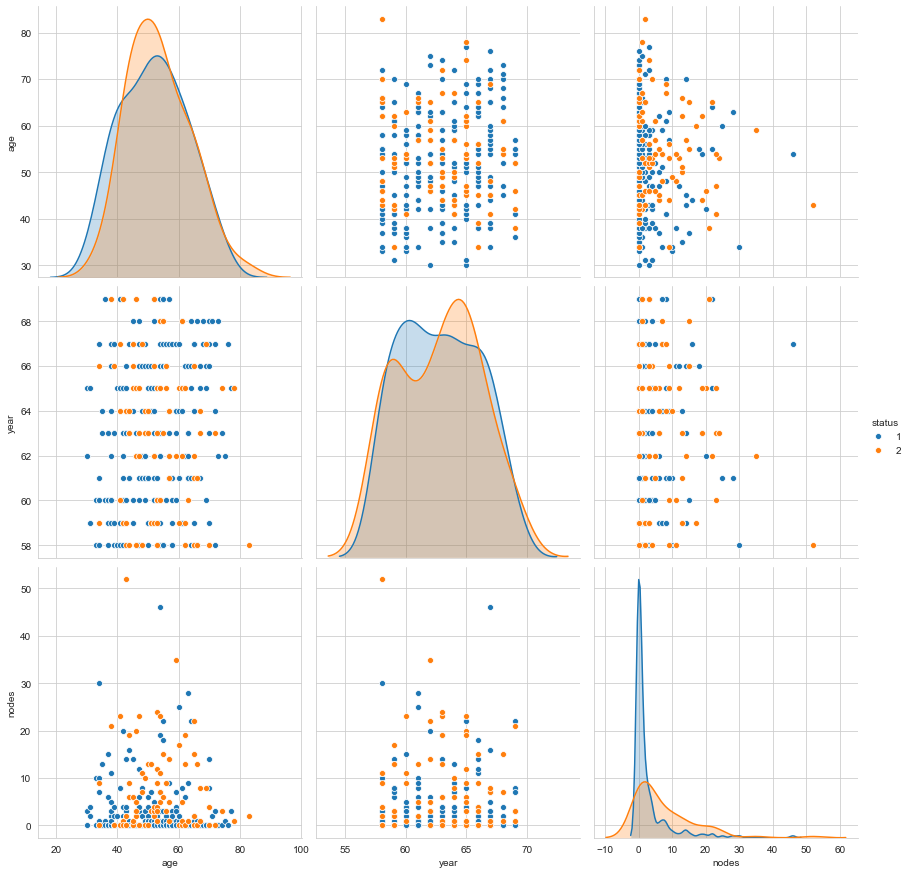

In [6]:
# Plotting pair plot, taking Status as hue parameter for analysis purpose.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(had, hue="status", height=4);
plt.show()

# Observation of PairPlot
1. Here total no. of columns are 4 thus it will form 4C2=6 plots
2. With age and nodes parameters it is more easier to analysise the survival rate of the patients
3. It is very difficult to figure out any useful information from plots having (age,year) or (year,nodes) parameters respectively

4.If no of features are high, then it is very difficult to figure out any useful information, as the no.of 2D pair plots will be very high.


# 1D scatter plot

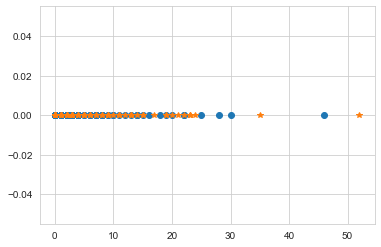

In [7]:
# 1D scatter plot
import numpy as np
had_survived_more = had.loc[had["status"] == 1];
had_survived_less = had.loc[had["status"] == 2];

plt.plot(had_survived_more["nodes"], np.zeros_like(had_survived_more["nodes"]), 'o')
plt.plot(had_survived_less["nodes"], np.zeros_like(had_survived_less["nodes"]),  '*')


plt.show()

# Observation
Can not figure out any useful information as most of the points are overlapping

# Histograms and PDFs

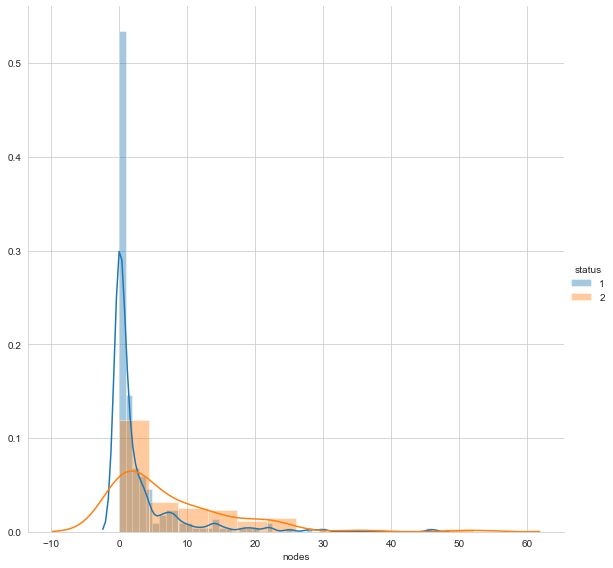

In [8]:
# Analysis related to No. of nodes
sns.FacetGrid(had, hue="status", height=8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();



# Observation
1. No. of nodes are 0, then the patient will survive more than 5 years
2. No. of nodes less than 2, their survival chances are more
3. No. of nodes >10, their survival chances are not more than 5 years.

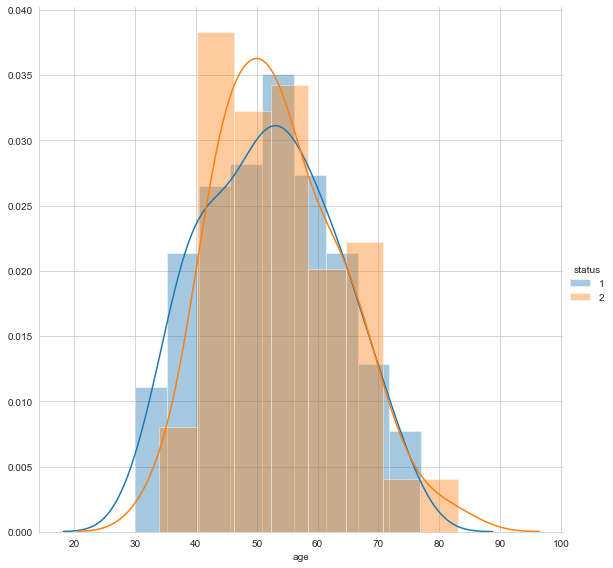

In [9]:
#Analysis of related to Age of the patient
sns.FacetGrid(had, hue="status", height=8) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# Observation
1. The minimum age of the patient is 30
2. The Maximum age of the patient is 83
3. The Age of the patient has no relation with their survival status.

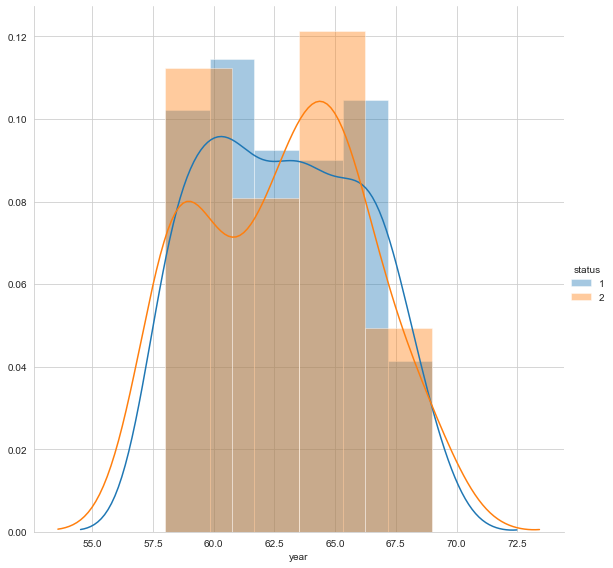

In [10]:
#Analysis related to the operation year of the patient
sns.FacetGrid(had, hue="status", height=8) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

# Observation

Both the PDFs are almost overlapping. Here we can roughly say that.The patients survival rate where more, in the operation year(60,63) than year (64,69)

# PDF and CDF of survival rate


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


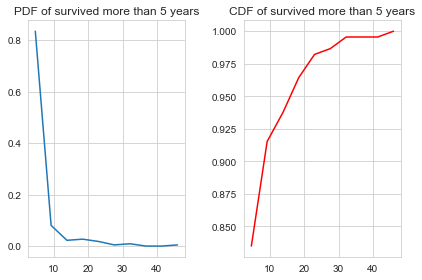

In [11]:
#CDFS and PDFS
counts, bin_edges = np.histogram(had_survived_more["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges[1:]);
cdf = np.cumsum(pdf)
plt.subplot(1,2,1)
plt.plot(bin_edges[1:],pdf);
plt.title('PDF of survived more than 5 years')
plt.subplot(1,2,2)
plt.plot(bin_edges[1:], cdf,'r')
plt.title('CDF of survived more than 5 years')
plt.tight_layout(); # used this as my figures were overlapping



# Observation:
1. In Long survived, 83% of Patients are having nodes less than 3.
2. There is 100% change that patient is likely to die, if they have more than 40 nodes

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


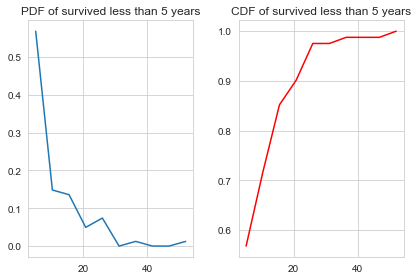

In [12]:
#CDFS and PDFS
counts, bin_edges = np.histogram(had_survived_less["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges[1:]);
cdf = np.cumsum(pdf)
plt.subplot(1,2,1)
plt.plot(bin_edges[1:],pdf);
plt.title('PDF of survived less than 5 years')
plt.subplot(1,2,2)
plt.plot(bin_edges[1:], cdf,'r')
plt.title('CDF of survived less than 5 years')
plt.tight_layout();

# Observation
1. In short survived, 55% of patients are having nodes less than 3.
2. There is 100% change that patient is likely to die, if they have more than 40 nodes

# Mean, Variance and Std-dev

In [13]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Mean of short lived:",np.mean(had_survived_less["nodes"]))
print("Mean of long lived:",np.mean(had_survived_more["nodes"]))


print("\nStd-dev:");
print("std Deviation of short lived:",np.std(had_survived_less["nodes"]))
print("std Deviation of longed lived:",np.std(had_survived_more["nodes"]))


Means:
Mean of short lived: 7.45679012345679
Mean of long lived: 2.799107142857143

Std-dev:
std Deviation of short lived: 9.128776076761632
std Deviation of longed lived: 5.869092706952767


# Obersvation
1. Mean of no. of nodes for short lived is 7.45 and mean of no. nodes for long lived is 2.7
2. Std dev in case of short lived is 9.12 and long lived is 5.8. This means data is more sparse in case of short lived.

# Median, Percentile, Quantile, IQR, MAD


In [14]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(had_survived_less["nodes"]))
print(np.median(had_survived_more["nodes"]))

print("\nQuantiles:")
print(np.percentile(had_survived_less["nodes"],np.arange(0, 100, 25)))
print(np.percentile(had_survived_more["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(had_survived_less["nodes"],90))
print(np.percentile(had_survived_more["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(had_survived_less["nodes"]))
print(robust.mad(had_survived_more["nodes"]))



Medians:
4.0
0.0

Quantiles:
[ 0.  1.  4. 11.]
[0. 0. 0. 3.]

90th Percentiles:
20.0
8.0

Median Absolute Deviation
5.930408874022408
0.0


# Observation
Median
1. The patient having average as 4 nodes have survived less than 5 years
2. The patient having 0 nodes have survived more than 5 years

Quantiles
1. 11 nodes were detected in 75% of patients who short lived.
2. 0 nodes were detected in 50% of patients who long lived.
3. 3 nodes were detected in 75% of patients who long lived.

90th Percentile
1. 90 % of patient will short survive. if no. of nodes detected is more than 20.
2. 90% of patient will long survive  if no. of nodes detected is less than 8. 

# Box plot and Whiskers

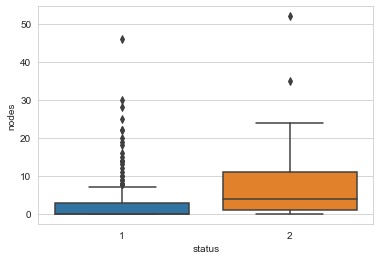

In [15]:
sns.boxplot(x='status',y='nodes', data=had)
plt.show()

# OBSERVATION

1. The 75th% of points from Long survival is nearly equal to 25th% of points of low survival
2. Threshold of Long survival is from 0 to 8
3. Threshold for Low survival is from 0 to 25
4. Median axillary_nodes for survived patients is zero. It is a central value
5. If nodes between 0 to 7 in High Survival have an error then there is a high chance that even points from Low Survival lie in it which is almost 50% error in short survival

# Violin plots

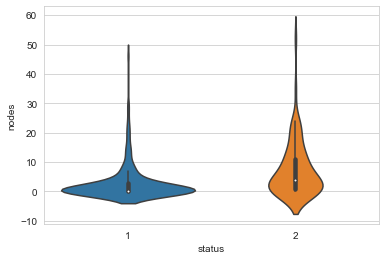

In [16]:
sns.violinplot(x='status',y='nodes', data=had, size=8)
plt.show()

# OBSERVATION

1. The spread of points in Long survival is more near 0 and that of Low survival is more near 2
2. The whiskers of Long survival extend from 0 to 7 and that of low survival extend from 0 to 25
3. The distribution is heavily right skewed.